In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Get basic information about the dataset
def data_overview(df):
    print("Data Shape:", df.shape)
    print("\nColumns:\n", df.columns)
    print("\nInfo:\n")
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nSummary Statistics:\n", df.describe())

data_overview(df)


Data Shape: (16598, 10)

Columns:
 Index(['Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, Wii Sports to Spirits & Spells
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.9+ MB
None

Missing Values:
 Rank              0
Platform          0
Year            271
Genre             

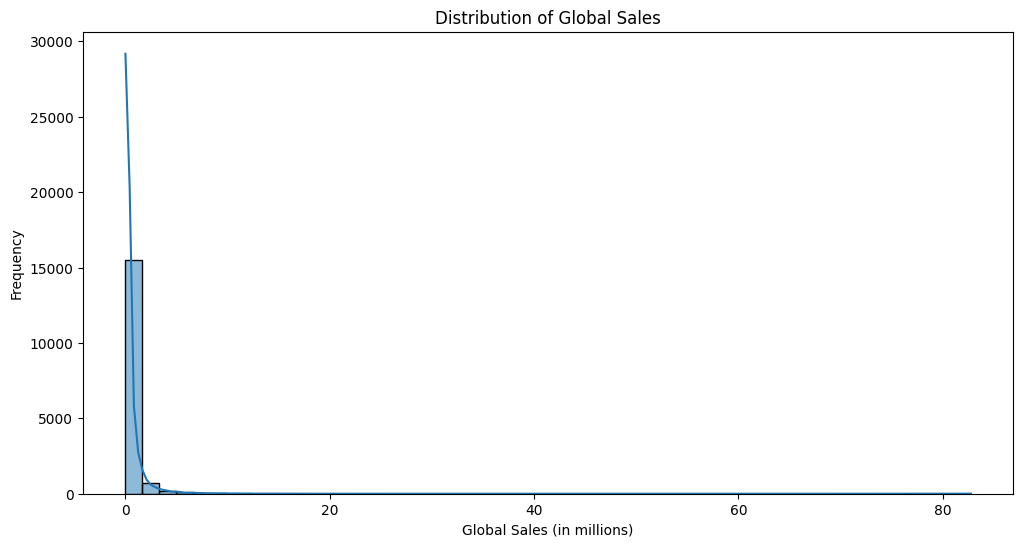

In [ ]:
def plot_global_sales_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Global_Sales'], kde=True, bins=50)
    plt.title('Distribution of Global Sales')
    plt.xlabel('Global Sales (in millions)')
    plt.ylabel('Frequency')
    plt.show()

plot_global_sales_distribution(df)


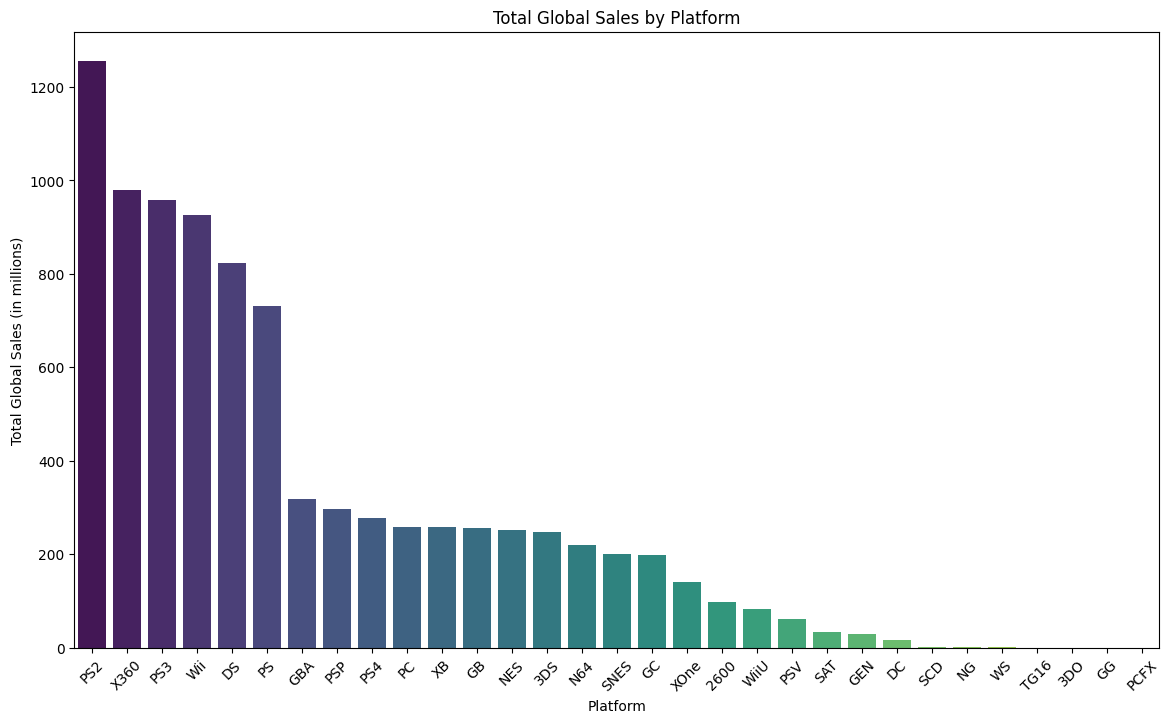

In [ ]:
def plot_sales_by_platform(df):
    plt.figure(figsize=(14, 8))
    platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
    sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="viridis")
    plt.title('Total Global Sales by Platform')
    plt.xlabel('Platform')
    plt.ylabel('Total Global Sales (in millions)')
    plt.xticks(rotation=45)
    plt.show()

plot_sales_by_platform(df)


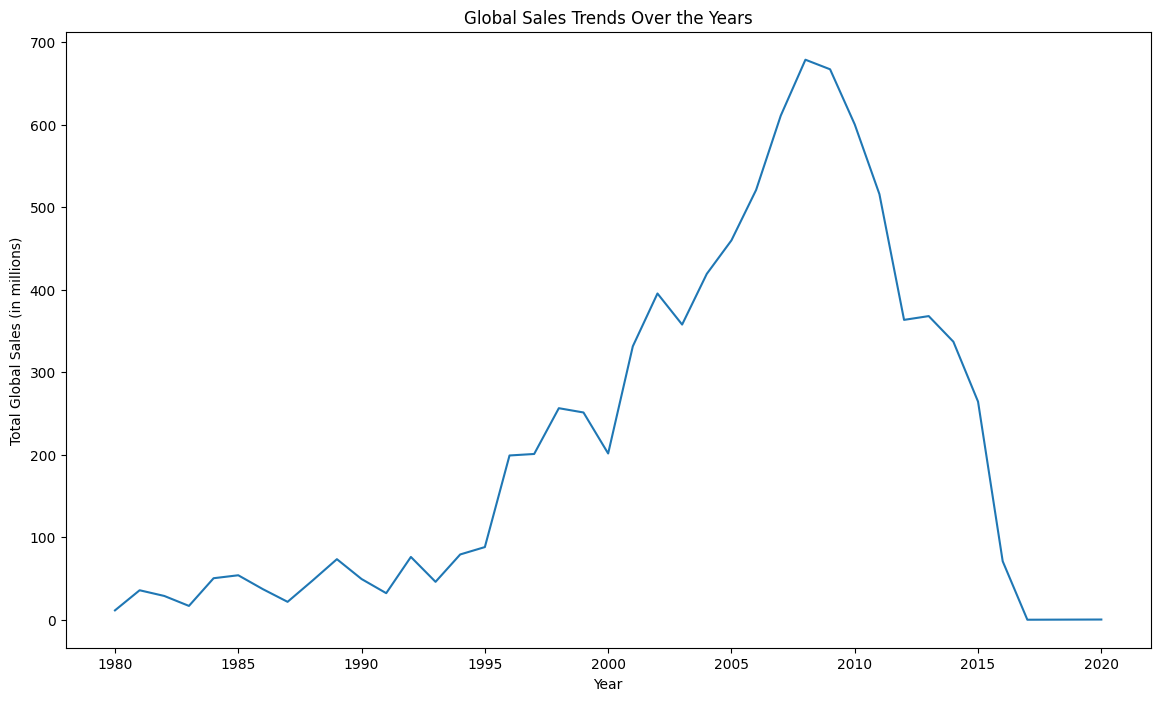

In [ ]:
def plot_sales_trends(df):
    plt.figure(figsize=(14, 8))
    yearly_sales = df.groupby('Year')['Global_Sales'].sum()
    sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
    plt.title('Global Sales Trends Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Total Global Sales (in millions)')
    plt.show()

plot_sales_trends(df)


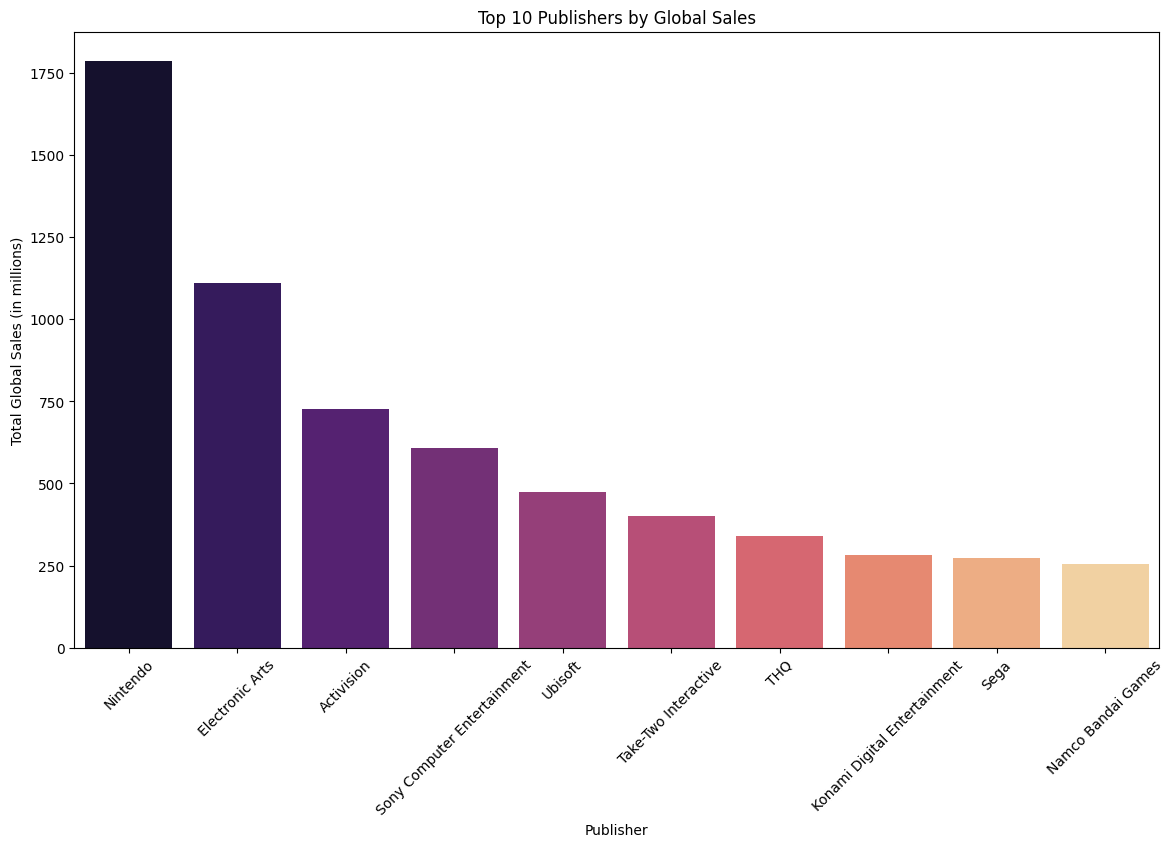

In [ ]:
def plot_top_publishers(df, top_n=10):
    plt.figure(figsize=(14, 8))
    publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(top_n)
    sns.barplot(x=publisher_sales.index, y=publisher_sales.values, palette="magma")
    plt.title(f'Top {top_n} Publishers by Global Sales')
    plt.xlabel('Publisher')
    plt.ylabel('Total Global Sales (in millions)')
    plt.xticks(rotation=45)
    plt.show()

plot_top_publishers(df)


In [ ]:
df = pd.read_csv("vgsalesGlobale.csv", index_col = "Name")

In [ ]:
df.head()


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.tail()


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Woody Woodpecker in Crazy Castle 5,16596,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
Men in Black II: Alien Escape,16597,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
SCORE International Baja 1000: The Official Game,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
Know How 2,16599,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
Spirits & Spells,16600,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


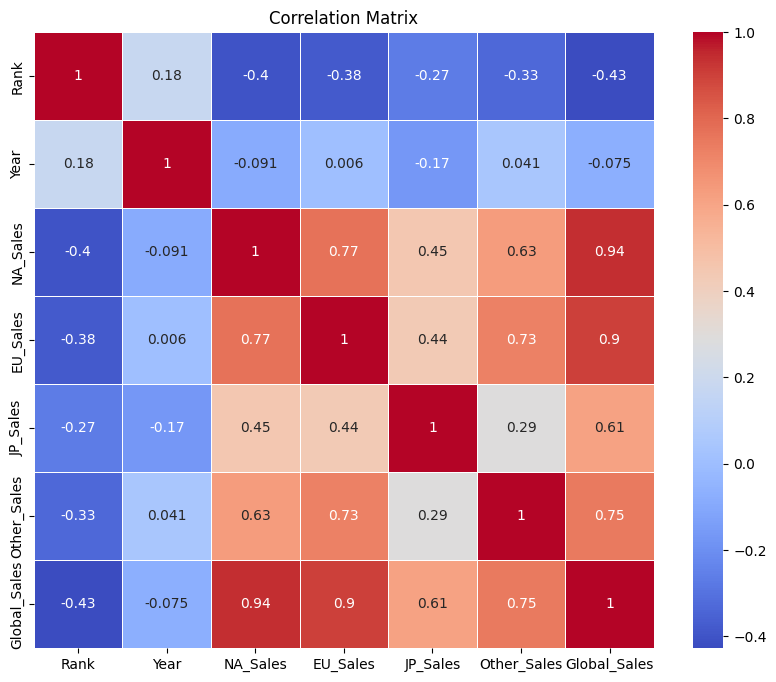

In [ ]:
def plot_correlation_matrix(df):
    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)
